<a href="https://colab.research.google.com/github/SahithiKuchimanchi/Cuisine-Classification/blob/main/Cuisine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switc

In [4]:
print("Cuisines Value Counts:")
print(df['Cuisines'].value_counts())

print("\nCity Value Counts:")
print(df['City'].value_counts())

print("\nCountry Code Value Counts:")
print(df['Country Code'].value_counts())

print("\nRating Color Value Counts:")
print(df['Rating color'].value_counts())

print("\nHas Table booking Value Counts:")
print(df['Has Table booking'].value_counts())

print("\nHas Online delivery Value Counts:")
print(df['Has Online delivery'].value_counts())

print("\nPrice range Value Counts:")
print(df['Price range'].value_counts())

Cuisines Value Counts:
Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64

City Value Counts:
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

Country Code Value Counts:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24


In [5]:
df.dropna(subset=['Cuisines'], inplace=True)
print("Shape after dropping missing 'Cuisines' values:", df.shape)

Shape after dropping missing 'Cuisines' values: (9542, 21)


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split 'Cuisines' into lists of individual cuisines
processed_cuisines = df['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',')])

# Instantiate MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the processed cuisines to create the target variable y
y = mlb.fit_transform(processed_cuisines)

print("Shape of target variable y:", y.shape)
print("First 5 rows of target variable y (MultiLabelBinarizer output):\n", y[:5])
print("Classes encoded by MultiLabelBinarizer:\n", mlb.classes_)

Shape of target variable y: (9542, 145)
First 5 rows of target variable y (MultiLabelBinarizer output):
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [7]:
X = df[['Country Code', 'City', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Votes']].copy()

print("Shape of feature DataFrame X:", X.shape)
print("First 5 rows of feature DataFrame X:\n", X.head())

Shape of feature DataFrame X: (9542, 12)
First 5 rows of feature DataFrame X:
    Country Code              City  Average Cost for two          Currency  \
0           162       Makati City                  1100  Botswana Pula(P)   
1           162       Makati City                  1200  Botswana Pula(P)   
2           162  Mandaluyong City                  4000  Botswana Pula(P)   
3           162  Mandaluyong City                  1500  Botswana Pula(P)   
4           162  Mandaluyong City                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  Votes  
0              

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['Country Code', 'City', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_features = ohe.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded features with appropriate column names
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

# Combine the one-hot encoded features with the numerical features
X = pd.concat([X[numerical_cols], X_encoded], axis=1)

print("Shape of preprocessed feature DataFrame X:", X.shape)
print("First 5 rows of preprocessed feature DataFrame X:\n", X.head())

Shape of preprocessed feature DataFrame X: (9542, 185)
First 5 rows of preprocessed feature DataFrame X:
    Country Code  Average Cost for two  Price range  Aggregate rating  Votes  \
0           162                  1100            3               4.8    314   
1           162                  1200            3               4.5    591   
2           162                  4000            4               4.4    270   
3           162                  1500            4               4.9    365   
4           162                  1500            4               4.8    229   

   Country Code_1  Country Code_14  Country Code_30  Country Code_37  \
0             0.0              0.0              0.0              0.0   
1             0.0              0.0              0.0              0.0   
2             0.0              0.0              0.0              0.0   
3             0.0              0.0              0.0              0.0   
4             0.0              0.0              0.0        

In [9]:
print("First 5 rows of target variable y (MultiLabelBinarizer output):\n", y[:5])

First 5 rows of target variable y (MultiLabelBinarizer output):
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Apply log transformation to skewed numerical features
X['Average Cost for two'] = np.log1p(X['Average Cost for two'])
X['Votes'] = np.log1p(X['Votes'])

# Initialize and fit RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for feature importances
feature_importances_series = pd.Series(feature_importances, index=X.columns)

# Sort and display top 100 features
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)
print("Top 100 most important features:")
print(sorted_feature_importances.head(100))

Top 100 most important features:
Votes                   0.362524
Average Cost for two    0.212457
Aggregate rating        0.160720
Price range             0.043552
City_New Delhi          0.013883
                          ...   
City_Birmingham         0.000441
City_Edinburgh          0.000434
City_Ankara             0.000429
City_Rio de Janeiro     0.000412
City_Abu Dhabi          0.000410
Length: 100, dtype: float64


In [11]:
selected_features = sorted_feature_importances.head(100).index.tolist()
X_selected = X[selected_features]

print("Shape of X_selected after feature selection:", X_selected.shape)
print("First 5 rows of X_selected:")
print(X_selected.head())

Shape of X_selected after feature selection: (9542, 100)
First 5 rows of X_selected:
      Votes  Average Cost for two  Aggregate rating  Price range  \
0  5.752573              7.003974               4.8            3   
1  6.383507              7.090910               4.5            3   
2  5.602119              8.294300               4.4            4   
3  5.902633              7.313887               4.9            4   
4  5.438079              7.313887               4.8            4   

   City_New Delhi  City_Gurgaon  Rating color_Yellow  City_Noida  \
0             0.0           0.0                  0.0         0.0   
1             0.0           0.0                  0.0         0.0   
2             0.0           0.0                  0.0         0.0   
3             0.0           0.0                  0.0         0.0   
4             0.0           0.0                  0.0         0.0   

   Has Table booking_No  Rating color_Green  ...  Currency_Brazilian Real(R$)  \
0               

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Model training complete.
Shape of X_train: (7633, 100)
Shape of X_test: (1909, 100)
Shape of y_train: (7633, 145)
Shape of y_test: (1909, 145)


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


Accuracy: 0.07

Classification Report:
                   precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         4
          African       0.00      0.00      0.00         3
         American       0.30      0.11      0.16        73
           Andhra       0.00      0.00      0.00         2
          Arabian       0.00      0.00      0.00         2
        Argentine       0.00      0.00      0.00         1
         Armenian       0.00      0.00      0.00         0
            Asian       0.00      0.00      0.00        50
     Asian Fusion       0.00      0.00      0.00         1
         Assamese       0.00      0.00      0.00         0
       Australian       0.00      0.00      0.00         1
           Awadhi       0.00      0.00      0.00         0
              BBQ       0.00      0.00      0.00         8
           Bakery       0.12      0.04      0.06       135
         Bar Food       0.50      0.08      0.13        13
          Belgia

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [14]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Generate a confusion matrix for multi-label classification
# multilabel_confusion_matrix returns an array of confusion matrices, one for each label
# We can sum them to get an overall view of true positives, false positives, etc., across all labels
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Sum the confusion matrices to get an overall view
# mcm[i] is [[TN, FP], [FN, TP]] for label i
overall_tn = mcm[:, 0, 0].sum()
overall_fp = mcm[:, 0, 1].sum()
overall_fn = mcm[:, 1, 0].sum()
overall_tp = mcm[:, 1, 1].sum()

print("\nOverall Multi-Label Confusion Matrix (summed across all classes):")
print(f"True Negatives: {overall_tn}")
print(f"False Positives: {overall_fp}")
print(f"False Negatives: {overall_fn}")
print(f"True Positives: {overall_tp}")

Accuracy: 0.07

Classification Report:
                   precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         4
          African       0.00      0.00      0.00         3
         American       0.30      0.11      0.16        73
           Andhra       0.00      0.00      0.00         2
          Arabian       0.00      0.00      0.00         2
        Argentine       0.00      0.00      0.00         1
         Armenian       0.00      0.00      0.00         0
            Asian       0.00      0.00      0.00        50
     Asian Fusion       0.00      0.00      0.00         1
         Assamese       0.00      0.00      0.00         0
       Australian       0.00      0.00      0.00         1
           Awadhi       0.00      0.00      0.00         0
              BBQ       0.00      0.00      0.00         8
           Bakery       0.12      0.04      0.06       135
         Bar Food       0.50      0.08      0.13        13
          Belgia

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [15]:
print("All evaluation metrics have been generated as requested.")

All evaluation metrics have been generated as requested.


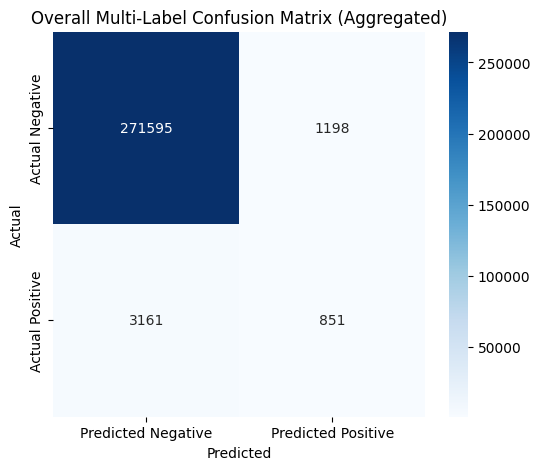

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

<Figure size 1200x700 with 0 Axes>

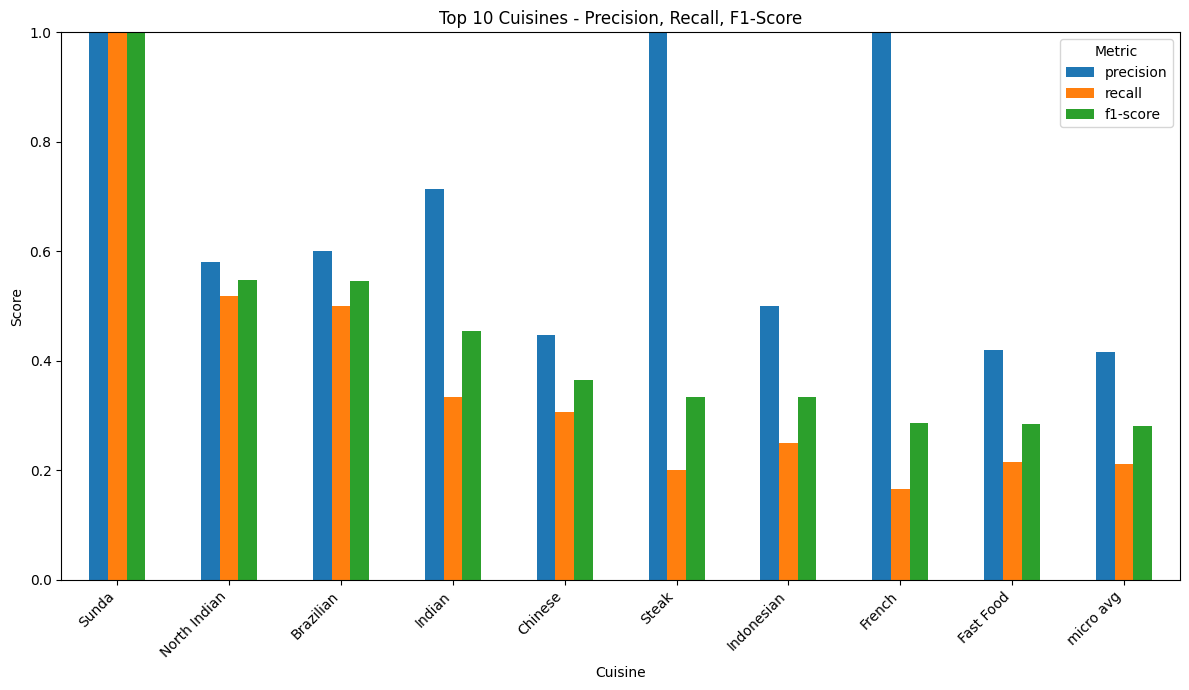

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 2x2 confusion matrix array from the aggregated values
overall_confusion_matrix = [
    [overall_tn, overall_fp],
    [overall_fn, overall_tp]
]

plt.figure(figsize=(6, 5))
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Overall Multi-Label Confusion Matrix (Aggregated)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract classification report into a DataFrame for easier plotting
report_dict = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Remove 'accuracy', 'macro avg', 'weighted avg' rows for cuisine-specific metrics
cuisine_metrics_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Convert precision, recall, f1-score to numeric, handling potential errors
cuisine_metrics_df['precision'] = pd.to_numeric(cuisine_metrics_df['precision'], errors='coerce')
cuisine_metrics_df['recall'] = pd.to_numeric(cuisine_metrics_df['recall'], errors='coerce')
cuisine_metrics_df['f1-score'] = pd.to_numeric(cuisine_metrics_df['f1-score'], errors='coerce')

# Sort by f1-score and select top N cuisines
top_n = 10 # You can adjust N as needed
top_cuisines_metrics = cuisine_metrics_df.sort_values(by='f1-score', ascending=False).head(top_n)

# Plotting Precision, Recall, F1-Score for top N cuisines
plt.figure(figsize=(12, 7))
top_cuisines_metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 7))
plt.title(f'Top {top_n} Cuisines - Precision, Recall, F1-Score')
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [17]:
print("All evaluation metrics have been generated as requested.")

All evaluation metrics have been generated as requested.
